<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Default_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [53]:
df_default=pd.read_excel("Default_Real_1.xlsx")
df_default.head()

,ID,TipoCredito,Desembolsado,Fecha,SaldoMora1M,SaldoMora2M,SaldoMora3M,SaldoMora4M,SaldoMora5M,SaldoMora6M,...,DiasAtraso3M,DiasAtraso4M,DiasAtraso5M,DiasAtraso6M,DiasAtraso7M,DiasAtraso8M,DiasAtraso9M,DiasAtraso10M,DiasAtraso11M,DiasAtraso12M
0,C97509,CREDITO MYPE,13000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-25.0,-25.0,-25.0,6.0,-25.0,-25.0,-25.0,5.0,6.0,6.0
1,C129147,CREDITO MYPE,10000.0,2022-01-01,0.0,0.0,0.0,0.0,9072.25,8743.2,...,5.0,6.0,36.0,36.0,6.0,5.0,6.0,5.0,6.0,6.0
2,C104922,CREDITO CONSUMO,30000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-16.0,-16.0,-47.0,-47.0,-46.0,-16.0,-16.0,-16.0,-16.0,-16.0
3,C176147,CREDITO GRAN EMPRESA,100000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
4,C195695,CREDITO CONSUMO,19500.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0


In [54]:
print("Volumen por TipoCredito:")
print(df_default['TipoCredito'].value_counts())
#print("-" * 30)

Volumen por TipoCredito:
TipoCredito
CREDITO MYPE            23419
CREDITO CONSUMO         12531
CREDITO GRAN EMPRESA     6035
Name: count, dtype: int64


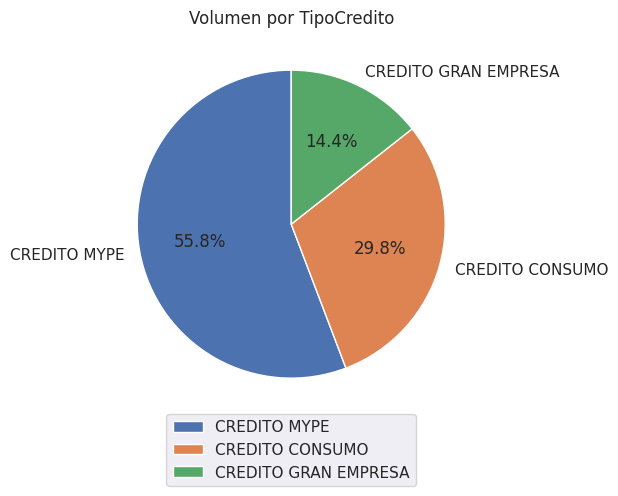

In [55]:
# Create a pie chart for TipoCredito volume
plt.figure(figsize=(5, 5))
df_default['TipoCredito'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Volumen por TipoCredito')
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()

In [56]:
print("Volumen por Fecha:")
print(df_default['Fecha'].value_counts().sort_index())
#print("-" * 30)

Volumen por Fecha:
Fecha
2022-01-01    2193
2022-02-01    3558
2022-03-01    2553
2022-04-01    3013
2022-05-01    3049
2022-06-01    3112
2022-07-01    3438
2022-08-01    4200
2022-09-01    4068
2022-10-01    3886
2022-11-01    4033
2022-12-01    4882
Name: count, dtype: int64


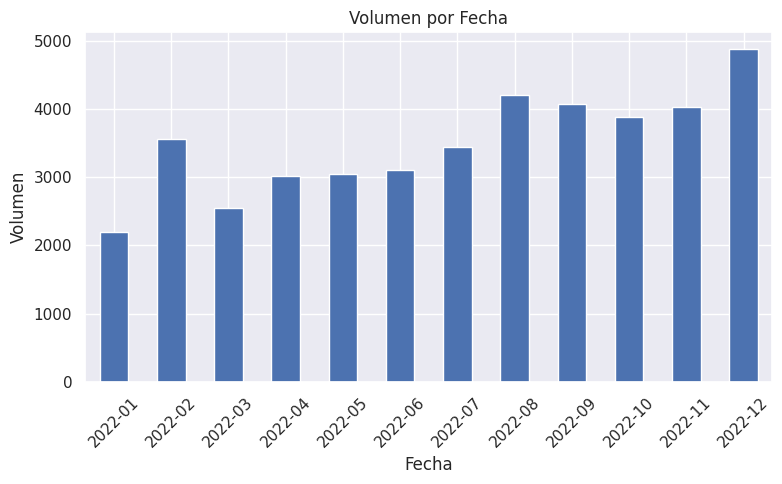

In [57]:
# Create a bar chart for Volume by Fecha, ordered by Fecha
plt.figure(figsize=(8, 5))
df_default['Fecha'].value_counts().sort_index().rename(index=lambda x: x.strftime('%Y-%m')).plot(kind='bar')
plt.title('Volumen por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
print("Volumen por TipoCredito and Fecha:")
print(df_default.groupby(['TipoCredito', 'Fecha']).size())

Volumen por TipoCredito and Fecha:
TipoCredito           Fecha     
CREDITO CONSUMO       2022-01-01     376
                      2022-02-01     610
                      2022-03-01     505
                      2022-04-01     611
                      2022-05-01     723
                      2022-06-01     783
                      2022-07-01    1034
                      2022-08-01    1692
                      2022-09-01    1543
                      2022-10-01    1397
                      2022-11-01    1466
                      2022-12-01    1791
CREDITO GRAN EMPRESA  2022-01-01     395
                      2022-02-01     506
                      2022-03-01     478
                      2022-04-01     508
                      2022-05-01     491
                      2022-06-01     518
                      2022-07-01     495
                      2022-08-01     475
                      2022-09-01     530
                      2022-10-01     519
                      2022-11-

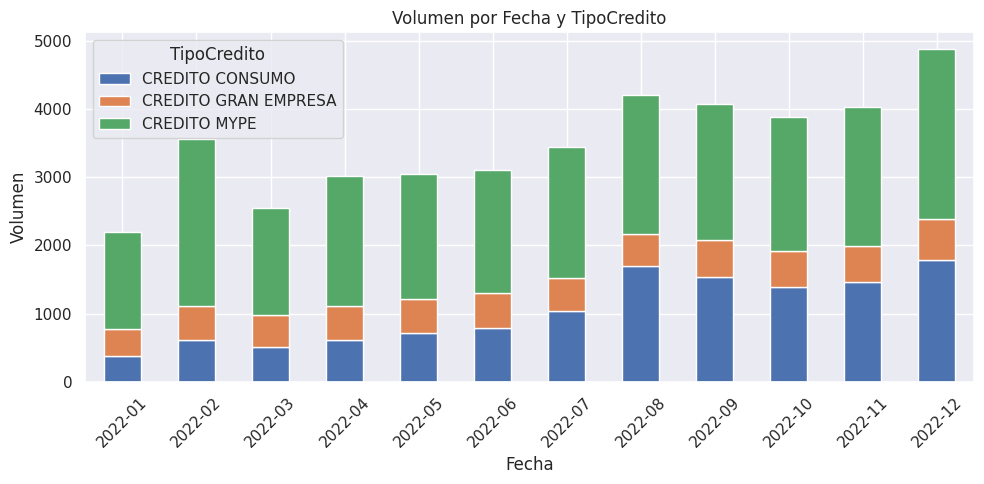

In [59]:
df_grouped = df_default.groupby(['Fecha', 'TipoCredito']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 5))
df_grouped.index = df_grouped.index.strftime('%Y-%m')
df_grouped.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Volumen por Fecha y TipoCredito')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

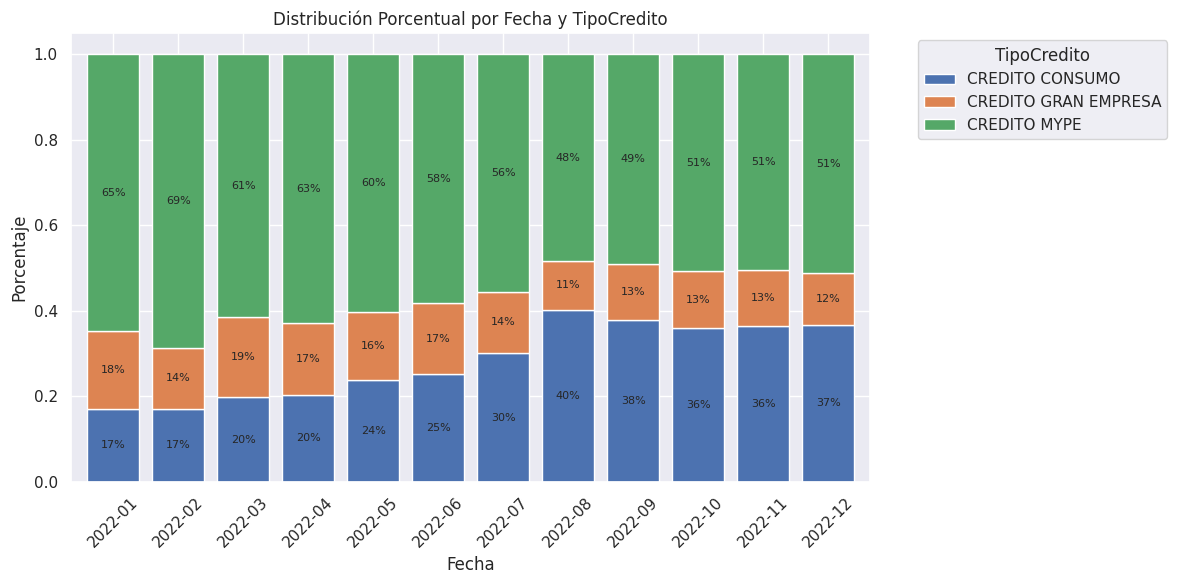

In [60]:
df_percentage = df_grouped.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(12, 6)) # Increase figure width to make bars appear wider
ax = df_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8) # Adjust bar width
plt.title('Distribución Porcentual por Fecha y TipoCredito')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='TipoCredito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
for c in ax.containers:
    labels = [f'{w:.0%}' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8) # Format labels and reduce font size
plt.show()

In [61]:
#df_default = df_default.drop(columns=['Default_12M', 'Default_12M_2'])

In [62]:
#df_default.head()

In [63]:
dias_atraso_cols = [col for col in df_default.columns if col.startswith('DiasAtraso')]
df_default['Default_12M'] = df_default[dias_atraso_cols].apply(lambda row: 1 if any(row >= 60) else 0, axis=1)
#display(df_default[['ID', 'Default'] + dias_atraso_cols].head())

In [64]:
df_default.head()

,ID,TipoCredito,Desembolsado,Fecha,SaldoMora1M,SaldoMora2M,SaldoMora3M,SaldoMora4M,SaldoMora5M,SaldoMora6M,...,DiasAtraso4M,DiasAtraso5M,DiasAtraso6M,DiasAtraso7M,DiasAtraso8M,DiasAtraso9M,DiasAtraso10M,DiasAtraso11M,DiasAtraso12M,Default_12M
0,C97509,CREDITO MYPE,13000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-25.0,-25.0,6.0,-25.0,-25.0,-25.0,5.0,6.0,6.0,0
1,C129147,CREDITO MYPE,10000.0,2022-01-01,0.0,0.0,0.0,0.0,9072.25,8743.2,...,6.0,36.0,36.0,6.0,5.0,6.0,5.0,6.0,6.0,0
2,C104922,CREDITO CONSUMO,30000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-16.0,-47.0,-47.0,-46.0,-16.0,-16.0,-16.0,-16.0,-16.0,0
3,C176147,CREDITO GRAN EMPRESA,100000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0
4,C195695,CREDITO CONSUMO,19500.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,0


In [65]:
dias_atraso_cols = [col for col in df_default.columns if col.startswith('DiasAtraso')]
saldo_mora_cols = [col for col in df_default.columns if col.startswith('SaldoMora')]

def check_default(row):
    for i in range(1, 13):
        dias_col = f'DiasAtraso{i}M'
        saldo_col = f'SaldoMora{i}M'
        if dias_col in row and saldo_col in row:
            if row[dias_col] >= 60 and row[saldo_col] > 100:
                return 1
    return 0

df_default['Default_12M_2'] = df_default.apply(check_default, axis=1)
#display(df_default[['ID', 'Default_12M'] + dias_atraso_cols + saldo_mora_cols].head())

In [66]:
df_default.head()

,ID,TipoCredito,Desembolsado,Fecha,SaldoMora1M,SaldoMora2M,SaldoMora3M,SaldoMora4M,SaldoMora5M,SaldoMora6M,...,DiasAtraso5M,DiasAtraso6M,DiasAtraso7M,DiasAtraso8M,DiasAtraso9M,DiasAtraso10M,DiasAtraso11M,DiasAtraso12M,Default_12M,Default_12M_2
0,C97509,CREDITO MYPE,13000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-25.0,6.0,-25.0,-25.0,-25.0,5.0,6.0,6.0,0,0
1,C129147,CREDITO MYPE,10000.0,2022-01-01,0.0,0.0,0.0,0.0,9072.25,8743.2,...,36.0,36.0,6.0,5.0,6.0,5.0,6.0,6.0,0,0
2,C104922,CREDITO CONSUMO,30000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-47.0,-47.0,-46.0,-16.0,-16.0,-16.0,-16.0,-16.0,0,0
3,C176147,CREDITO GRAN EMPRESA,100000.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0,0
4,C195695,CREDITO CONSUMO,19500.0,2022-01-01,0.0,0.0,0.0,0.0,0.00,0.0,...,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,0,0


In [67]:
overall_default_12m_percentage = (df_default['Default_12M'].sum() / len(df_default)) * 100
overall_default_12m_2_percentage = (df_default['Default_12M_2'].sum() / len(df_default)) * 100

print(f"Porcentaje de Default_12M = 1: {overall_default_12m_percentage:.2f}%")
print(f"Porcentaje de Default_12M_2 = 1: {overall_default_12m_2_percentage:.2f}%")

Porcentaje de Default_12M = 1: 4.23%
Porcentaje de Default_12M_2 = 1: 4.13%


In [69]:
default_by_fecha = df_default.groupby('Fecha')[['Default_12M', 'Default_12M_2']].mean() * 100
default_by_fecha

,Default_12M,Default_12M_2
Fecha,,
2022-01-01,3.055176,3.055176
2022-02-01,4.693648,4.665542
2022-03-01,2.271837,2.232667
2022-04-01,3.783604,3.750415
2022-05-01,3.673336,3.607740
2022-06-01,4.434447,4.370180
2022-07-01,4.682955,4.653869
2022-08-01,5.166667,5.047619
2022-09-01,5.162242,5.039331


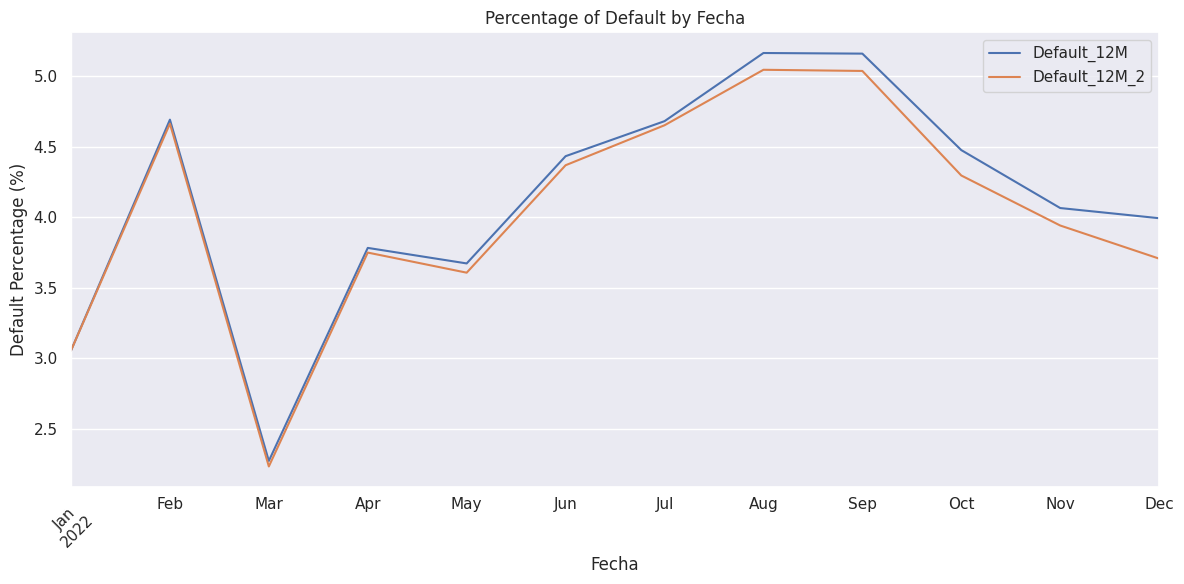

In [75]:
plt.figure(figsize=(12, 6))
default_by_fecha.plot(kind='line', ax=plt.gca())
plt.title('Percentage of Default by Fecha')
plt.xlabel('Fecha')
plt.ylabel('Default Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
default_by_tipocredito = df_default.groupby('TipoCredito')[['Default_12M', 'Default_12M_2']].mean() * 100
default_by_tipocredito

,Default_12M,Default_12M_2
TipoCredito,,
CREDITO CONSUMO,5.466443,5.242997
CREDITO GRAN EMPRESA,1.640431,1.607291
CREDITO MYPE,4.240147,4.180366


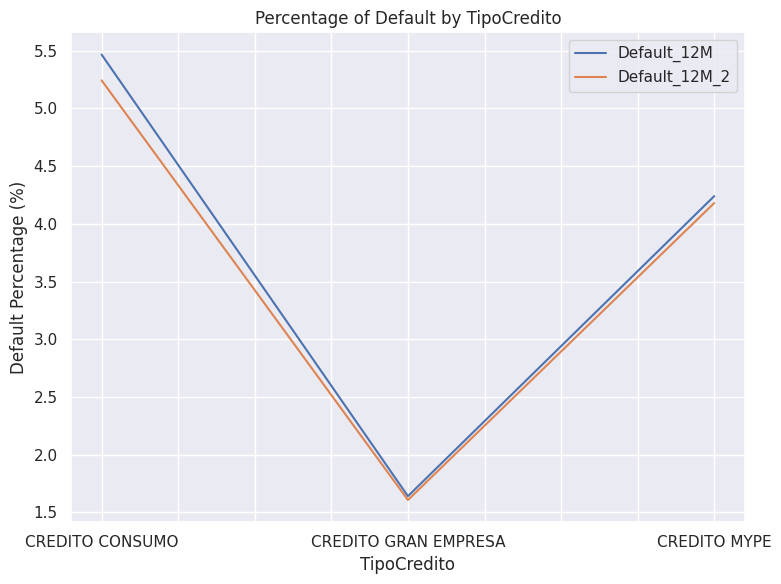

In [78]:
plt.figure(figsize=(8, 6))
default_by_tipocredito.plot(kind='line', ax=plt.gca())
plt.title('Percentage of Default by TipoCredito')
plt.xlabel('TipoCredito')
plt.ylabel('Default Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:
default_by_fecha_tipocredito = df_default.groupby(['Fecha', 'TipoCredito'])[['Default_12M', 'Default_12M_2']].mean() * 100
default_by_fecha_tipocredito

Default_12M  Default_12M_2
Fecha      TipoCredito                                     
2022-01-01 CREDITO CONSUMO          1.595745       1.595745
           CREDITO GRAN EMPRESA     2.278481       2.278481
           CREDITO MYPE             3.656821       3.656821
2022-02-01 CREDITO CONSUMO          5.573770       5.573770
           CREDITO GRAN EMPRESA     1.383399       1.383399
           CREDITO MYPE             5.159705       5.118755
2022-03-01 CREDITO CONSUMO          2.970297       2.970297
           CREDITO GRAN EMPRESA     1.464435       1.464435
           CREDITO MYPE             2.292994       2.229299
2022-04-01 CREDITO CONSUMO          3.600655       3.600655
           CREDITO GRAN EMPRESA     2.165354       2.165354
           CREDITO MYPE             4.276663       4.223865
2022-05-01 CREDITO CONSUMO          3.872752       3.872752
           CREDITO GRAN EMPRESA     1.018330       0.814664
           CREDITO MYPE             4.305177       4.250681
2022-06-01 CREDITO CONSUMO          6.002554       6.002554
           CREDITO GRAN EMPRESA     1.158301       1.158301
           CREDITO MYPE             4.693539       4.583103
2022-07-01 CREDITO CONSUMO          7.156673       7.156673
           CREDITO GRAN EMPRESA     1.616162       1.616162
           CREDITO MYPE             4.138292       4.085909
2022-08-01 CREDITO CONSUMO          6.501182       6.264775
           CREDITO GRAN EMPRESA     1.473684       1.473684
           CREDITO MYPE             4.918839       4.869651
2022-09-01 CREDITO CONSUMO          6.675308       6.416073
           CREDITO GRAN EMPRESA     2.452830       2.452830
           CREDITO MYPE             4.711779       4.661654
2022-10-01 CREDITO CONSUMO          6.370795       5.869721
           CREDITO GRAN EMPRESA     2.119461       2.119461
           CREDITO MYPE             3.756345       3.756345
2022-11-01 CREDITO CONSUMO          4.911323       4.638472
           CREDITO GRAN EMPRESA     2.272727       2.083333
           CREDITO MYPE             3.923492       3.923492
2022-12-01 CREDITO CONSUMO          4.745952       4.243439
           CREDITO GRAN EMPRESA     0.506757       0.506757
           CREDITO MYPE             4.281713       4.081633

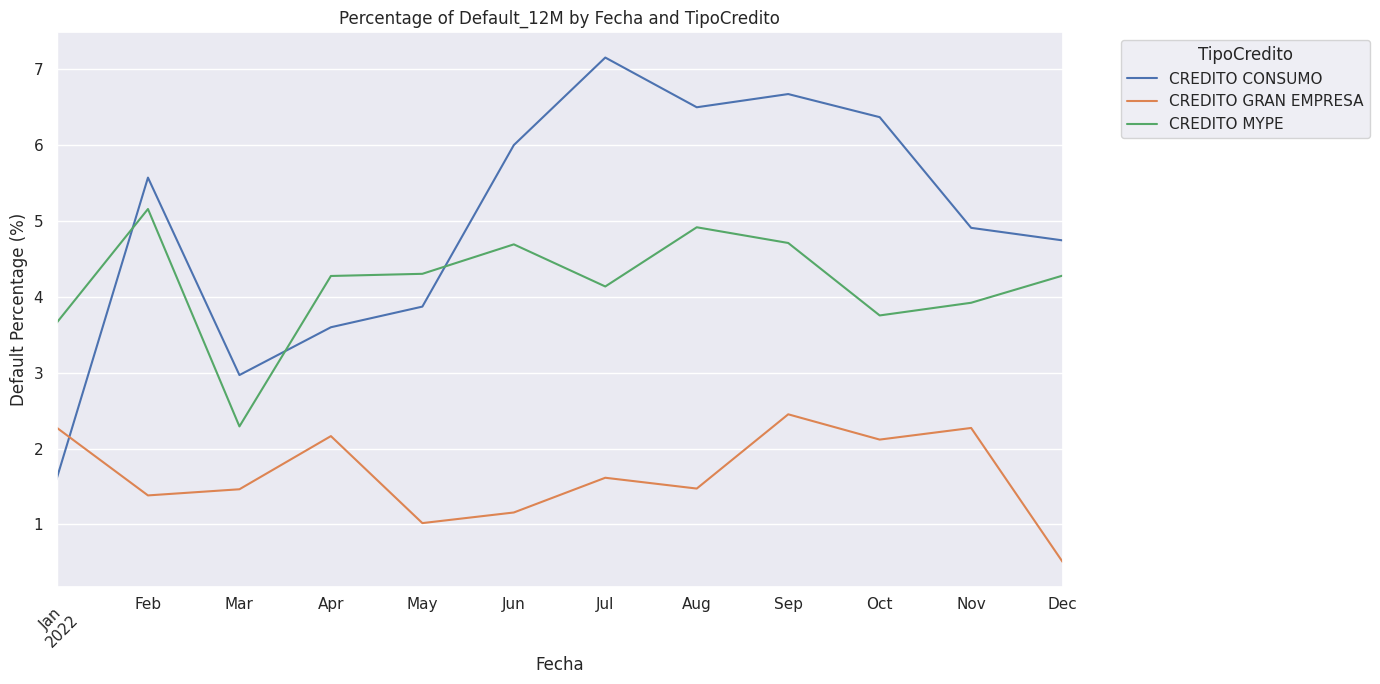

In [79]:
df_unstacked = default_by_fecha_tipocredito.unstack(level='TipoCredito')
plt.figure(figsize=(14, 7))
df_unstacked['Default_12M'].plot(kind='line', ax=plt.gca())
plt.title('Percentage of Default_12M by Fecha and TipoCredito')
plt.xlabel('Fecha')
plt.ylabel('Default Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='TipoCredito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

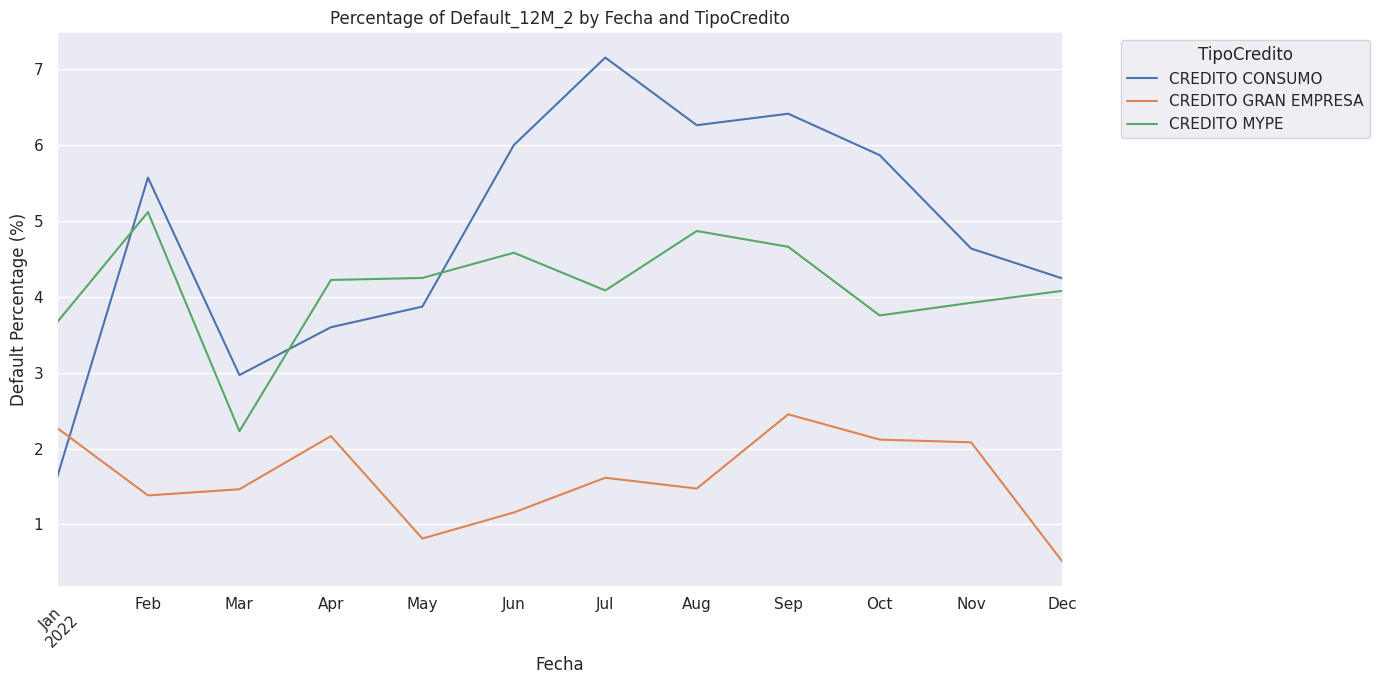

In [80]:
plt.figure(figsize=(14, 7))
df_unstacked['Default_12M_2'].plot(kind='line', ax=plt.gca())
plt.title('Percentage of Default_12M_2 by Fecha and TipoCredito')
plt.xlabel('Fecha')
plt.ylabel('Default Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='TipoCredito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()